In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
import matplotlib as mpl

# 한글 폰트 설정 (예: 맑은 고딕)
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [2]:
df = pd.read_excel('./join_df_sep-36w-25.xlsx',sheet_name='df')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55396 entries, 0 to 55395
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   USER_SEQ                  55396 non-null  int64         
 1   PLATFORM_TYPE             55396 non-null  object        
 2   TYPE_ENUM                 55396 non-null  object        
 3   LOGIN_DTTM                55396 non-null  object        
 4   LOGIN_CNT                 55396 non-null  int64         
 5   TOTAL_ACCESS_DAYS         55396 non-null  int64         
 6   UNSEEN_DAYS               55396 non-null  int64         
 7   TOTAL_LIFETIME            55396 non-null  int64         
 8   REG_DT                    55396 non-null  object        
 9   IS_SURVIVED               55396 non-null  bool          
 10  treatment.push_received   4667 non-null   float64       
 11  treatment.event_time_min  4667 non-null   datetime64[ns]
 12  treatment.event_ti

In [4]:
df['LOGIN_DTTM'] = pd.to_datetime(df['LOGIN_DTTM'])

In [5]:
df['treatment.push_received']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
55391     NaN
55392     3.0
55393     NaN
55394    14.0
55395     NaN
Name: treatment.push_received, Length: 55396, dtype: float64

In [6]:
df[df['treatment.push_received'].notna()]

,USER_SEQ,PLATFORM_TYPE,TYPE_ENUM,LOGIN_DTTM,LOGIN_CNT,TOTAL_ACCESS_DAYS,UNSEEN_DAYS,TOTAL_LIFETIME,REG_DT,IS_SURVIVED,treatment.push_received,treatment.event_time_min,treatment.event_time_max
24,100258,Android,BUYER.TYPE.NORMAL,2025-07-17 20:15:14,0,2,46,59,2025-07-04 00:00:00,False,9.0,2025-07-10 20:15:17,2025-07-28 19:06:02
35,104831,Android,BUYER.TYPE.NORMAL,2025-07-08 05:20:17,0,1,55,55,2025-07-08 00:00:00,False,2.0,2025-07-10 20:17:01,2025-07-11 18:06:01
39,100380,Android,BUYER.TYPE.NORMAL,2025-07-12 14:16:28,0,3,51,59,2025-07-04 00:00:00,False,4.0,2025-07-10 20:16:01,2025-07-15 18:09:01
82,100856,Android,BUYER.TYPE.NORMAL,2025-07-18 12:52:25,0,2,45,59,2025-07-04 00:00:00,False,3.0,2025-08-13 19:06:03,2025-08-18 19:09:01
83,105012,Android,BUYER.TYPE.NORMAL,2025-07-08 09:58:40,0,1,55,55,2025-07-08 00:00:00,False,4.0,2025-07-10 20:34:27,2025-07-15 18:22:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55386,10176,Android,BUYER.TYPE.NORMAL,2025-08-29 23:29:54,0,81,3,81,2025-06-12 00:00:00,True,12.0,2025-07-10 20:15:15,2025-08-18 19:12:13
55388,9717,Android,BUYER.TYPE.NORMAL,2025-08-30 21:25:21,0,81,2,81,2025-06-12 00:00:00,True,12.0,2025-07-10 20:29:01,2025-08-18 19:16:01
55390,6489,Android,BUYER.TYPE.NORMAL,2025-08-30 22:53:27,0,81,2,81,2025-06-12 00:00:00,True,5.0,2025-07-16 18:22:04,2025-08-18 19:12:02
55392,10408,Android,BUYER.TYPE.NORMAL,2025-08-31 14:02:44,0,81,1,81,2025-06-12 00:00:00,True,3.0,2025-07-10 20:19:01,2025-08-18 19:07:01


### 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55396 entries, 0 to 55395
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   USER_SEQ                  55396 non-null  int64         
 1   PLATFORM_TYPE             55396 non-null  object        
 2   TYPE_ENUM                 55396 non-null  object        
 3   LOGIN_DTTM                55396 non-null  datetime64[ns]
 4   LOGIN_CNT                 55396 non-null  int64         
 5   TOTAL_ACCESS_DAYS         55396 non-null  int64         
 6   UNSEEN_DAYS               55396 non-null  int64         
 7   TOTAL_LIFETIME            55396 non-null  int64         
 8   REG_DT                    55396 non-null  object        
 9   IS_SURVIVED               55396 non-null  bool          
 10  treatment.push_received   4667 non-null   float64       
 11  treatment.event_time_min  4667 non-null   datetime64[ns]
 12  treatment.event_ti

In [ ]:
df

,USER_SEQ,PLATFORM_TYPE,TYPE_ENUM,LOGIN_DTTM,LOGIN_CNT,TOTAL_ACCESS_DAYS,UNSEEN_DAYS,TOTAL_LIFETIME,REG_DT,IS_SURVIVED,treatment.push_received,treatment.event_time_min,treatment.event_time_max,is_target
0,104749,Android,BUYER.TYPE.NORMAL,2025-07-08 00:05:32.000000000,0,1,55,55,2025-07-08 00:00:00,False,NaN,NaT,NaT,False
1,104751,Android,BUYER.TYPE.NORMAL,2025-07-08 00:06:25.000000000,0,1,55,55,2025-07-08 00:00:00,False,NaN,NaT,NaT,False
2,104752,Android,BUYER.TYPE.NORMAL,2025-07-08 00:09:39.000000000,0,1,55,55,2025-07-08 00:00:00,False,NaN,NaT,NaT,False
3,104756,iOS,BUYER.TYPE.NORMAL,2025-07-08 00:24:58.000000000,0,1,55,55,2025-07-08 00:00:00,False,NaN,NaT,NaT,False
4,104757,Android,BUYER.TYPE.NORMAL,2025-07-08 00:25:40.000000000,0,1,55,55,2025-07-08 00:00:00,False,NaN,NaT,NaT,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55391,31514,Android,BUYER.TYPE.NORMAL,2025-08-31 10:01:08.000000000,0,81,1,81,2025-06-12 00:00:00,True,NaN,NaT,NaT,False
55392,10408,Android,BUYER.TYPE.NORMAL,2025-08-31 14:02:44.000000000,0,81,1,81,2025-06-12 00:00:00,True,3.0,2025-07-10 20:19:01,2025-08-18 19:07:01,True
55393,23201,Android,BUYER.TYPE.NORMAL,2025-08-31 23:37:33.000000000,0,81,1,81,2025-06-12 00:00:00,True,NaN,NaT,NaT,False
55394,7065,Android,BUYER.TYPE.NORMAL,2025-07-24 23:08:43.000000000,0,82,39,81,2025-06-12 00:00:00,False,14.0,2025-07-10 20:32:02,2025-08-18 19:05:04,True


=== 완전한 클래스로 분석 실행 ===
=== 데이터 전처리 시작 ===
=== 데이터 타입 변환 중 ===
=== 전처리 완료 ===
데이터 크기: (55396, 16)
치료군: 3,221명
대조군: 52,175명
생존자: 12,331명

=== 주요 변수 데이터 타입 ===
treatment: int32
IS_SURVIVED: int32
TOTAL_ACCESS_DAYS: int64
UNSEEN_DAYS: int64
TOTAL_LIFETIME: int64
treatment.push_received: float64
platform_Android: int32
platform_iOS: int32
성향 점수 범위 : 0.001 - 0.987
매칭 성공: 3221쌍
매칭 후 치료군: 3221
매칭 후 대조군: 3221

=== 공변량 균형 검사 ===
                  Variable  Before_Std_Diff  After_Std_Diff  Improvement
0        TOTAL_ACCESS_DAYS            1.487          -0.031        1.456
1              UNSEEN_DAYS           -0.830           0.295        0.535
2           TOTAL_LIFETIME            2.148          -0.033        2.115
3  treatment.push_received            0.422           0.440       -0.017
4         platform_Android            0.185           0.331       -0.146
5             platform_iOS           -0.185          -0.331       -0.146


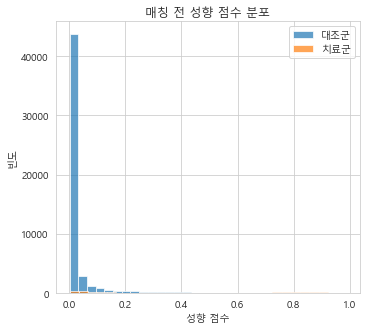

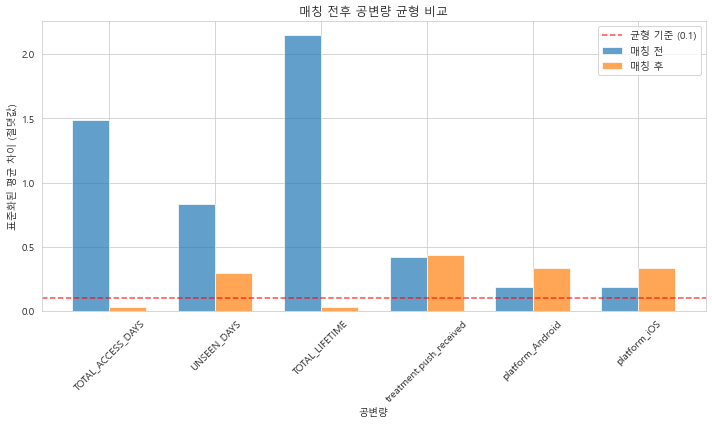

=== 매칭 전 로지스틱 회귀 분석 ===
         Current function value: 0.155199
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            IS_SURVIVED   No. Observations:                55396
Model:                          Logit   Df Residuals:                    55389
Method:                           MLE   Df Model:                            6
Date:                Tue, 02 Sep 2025   Pseudo R-squ.:                  0.7073
Time:                        14:15:06   Log-Likelihood:                -8597.4
converged:                      False   LL-Null:                       -29370.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.3714        nan        nan        nan         nan         nan
tr

c:\Users\Owner\miniconda3\envs\pymc\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# 완전한 CampaignEffectAnalysis 클래스 정의
class CampaignEffectAnalysis:
    def __init__(self, data):
        self.data = data.copy()
        self.matched_data = None
        self.propensity_scores = None

    def preprocess_data(self):
        """데이터 전처리 - 완전히 수정된 버전"""
        print("=== 데이터 전처리 시작 ===")
        
        # 1. treatment 변수 생성
        self.data['treatment'] = False
        self.data.loc[(self.data['treatment.push_received'].notna()) & 
                      (self.data['treatment.event_time_min'] <= self.data['LOGIN_DTTM']), 'treatment'] = True
        
        # 2. 결측값 처리
        numeric_cols = ['TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']
        self.data[numeric_cols] = self.data[numeric_cols].fillna(self.data[numeric_cols].median())
        
        # 3. 범주형 변수 더미 변수화
        self.data = pd.get_dummies(self.data, columns=['PLATFORM_TYPE'], prefix='platform')
        
        # 4. 모든 데이터 타입을 명시적으로 변환
        print("=== 데이터 타입 변환 중 ===")
        
        # Boolean을 int로 변환
        self.data['IS_SURVIVED'] = self.data['IS_SURVIVED'].astype(int)
        self.data['treatment'] = self.data['treatment'].astype(int)
        
        # platform 더미 변수들을 int로 변환 (중요!)
        platform_columns = [col for col in self.data.columns if col.startswith('platform_')]
        for col in platform_columns:
            self.data[col] = self.data[col].astype(int)
        
        # 모든 숫자형 컬럼을 명시적으로 숫자형으로 변환
        numeric_columns = ['TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']
        
        for col in numeric_columns:
            if col in self.data.columns:
                self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
        
        # NaN 값 처리
        for col in numeric_columns + platform_columns:
            if col in self.data.columns and self.data[col].isnull().any():
                print(f"경고: {col}에 NaN 값이 있습니다. 0으로 채웁니다.")
                self.data[col] = self.data[col].fillna(0)
        
        # 5. 변환된 데이터 정보 출력
        print("=== 전처리 완료 ===")
        print(f"데이터 크기: {self.data.shape}")
        print(f"치료군: {self.data['treatment'].sum():,}명")
        print(f"대조군: {(self.data['treatment'] == 0).sum():,}명")
        print(f"생존자: {self.data['IS_SURVIVED'].sum():,}명")
        
        # 6. 주요 변수 데이터 타입 확인
        print("\n=== 주요 변수 데이터 타입 ===")
        key_columns = ['treatment', 'IS_SURVIVED', 'TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']
        key_columns.extend(platform_columns)
        
        for col in key_columns:
            if col in self.data.columns:
                print(f"{col}: {self.data[col].dtype}")
        
        return self.data
    
    def calculate_propensity_score(self):
        """성향점수 계산"""
        
        covariate_cols = ['TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']

        X = self.data[covariate_cols]
        y = self.data['treatment']

        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # 로지스틱 회귀 -> 성향 점수 계산
        ps_model = LogisticRegression(random_state=42)
        ps_model.fit(X_scaled, y)

        # 성향 점수 예측
        self.propensity_scores = ps_model.predict_proba(X_scaled)[:, 1]
        self.data['propensity_score'] = self.propensity_scores

        print(f"성향 점수 범위 : {self.propensity_scores.min():.3f} - {self.propensity_scores.max():.3f}")
        # 성향 점수 분포 시각화
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(self.propensity_scores[self.data['treatment'] == 0], alpha=0.7, bins=30, label='대조군')
        plt.hist(self.propensity_scores[self.data['treatment'] == 1], alpha=0.7, bins=30, label='치료군')
        plt.xlabel('성향 점수')
        plt.ylabel('빈도')
        plt.title('매칭 전 성향 점수 분포')
        plt.legend()
        
        return ps_model, scaler    
    
    def perform_matching(self, caliper=0.1):
        """매칭 수행"""
        
        treated = self.data[self.data['treatment'] == 1].copy()
        control = self.data[self.data['treatment'] == 0].copy()

        nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(control['propensity_score'].values.reshape(-1, 1))

        distances, indices = nbrs.kneighbors(treated[['propensity_score']].values)
        # 캘리퍼 조건 확인
        valid_matches = distances.flatten() <= caliper

        if valid_matches.sum() == 0:
            print("매칭 조건을 만족하는 데이터가 없습니다.")
            return None
        
        matched_treated = treated[valid_matches].copy()
        matched_control_indices = indices.flatten()[valid_matches]
        matched_control = control.iloc[matched_control_indices].copy()

        self.matched_data = pd.concat([matched_treated, matched_control], ignore_index=True)

        print(f"매칭 성공: {len(matched_treated)}쌍")
        print(f"매칭 후 치료군: {len(matched_treated)}")
        print(f"매칭 후 대조군: {len(matched_control)}")
        
    def check_balance(self):
        """매칭 전후 공변량 균형 검사"""
        print("\n=== 공변량 균형 검사 ===")
        
        covariate_cols = ['TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']
        platform_cols = [col for col in self.data.columns if col.startswith('platform_')]
        all_covariates = covariate_cols + platform_cols
        
        balance_results = []
        
        for col in all_covariates:
            # 매칭 전
            before_treated = self.data[self.data['treatment'] == 1][col]
            before_control = self.data[self.data['treatment'] == 0][col]
            before_diff = before_treated.mean() - before_control.mean()
            before_std_diff = before_diff / np.sqrt((before_treated.var() + before_control.var()) / 2)
            
            # 매칭 후
            after_treated = self.matched_data[self.matched_data['treatment'] == 1][col]
            after_control = self.matched_data[self.matched_data['treatment'] == 0][col]
            after_diff = after_treated.mean() - after_control.mean()
            after_std_diff = after_diff / np.sqrt((after_treated.var() + after_control.var()) / 2)
            
            balance_results.append({
                'Variable': col,
                'Before_Std_Diff': before_std_diff,
                'After_Std_Diff': after_std_diff,
                'Improvement': abs(before_std_diff) - abs(after_std_diff)
            })
        
        balance_df = pd.DataFrame(balance_results)
        print(balance_df.round(3))
        
        # 균형 시각화
        plt.figure(figsize=(10, 6))
        x = np.arange(len(balance_df))
        width = 0.35
        
        plt.bar(x - width/2, abs(balance_df['Before_Std_Diff']), width, label='매칭 전', alpha=0.7)
        plt.bar(x + width/2, abs(balance_df['After_Std_Diff']), width, label='매칭 후', alpha=0.7)
        
        plt.xlabel('공변량')
        plt.ylabel('표준화된 평균 차이 (절댓값)')
        plt.title('매칭 전후 공변량 균형 비교')
        plt.xticks(x, balance_df['Variable'], rotation=45)
        plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='균형 기준 (0.1)')
        plt.legend()
        plt.tight_layout()
        plt.show()
        
        return balance_df
    
    def logistic_regression_analysis(self):
        """로지스틱 회귀 분석 - 수정된 버전"""
        
        # 매칭 전 전체 데이터 분석
        covariate_cols = ['treatment', 'TOTAL_ACCESS_DAYS', 'UNSEEN_DAYS', 'TOTAL_LIFETIME', 'treatment.push_received']
        platform_cols = [col for col in self.data.columns if col.startswith('platform_')]

        X_full = self.data[covariate_cols + platform_cols]
        X_full = sm.add_constant(X_full)
        y_full = self.data['IS_SURVIVED']

        print("=== 매칭 전 로지스틱 회귀 분석 ===")
        model_full = sm.Logit(y_full, X_full).fit()
        print(model_full.summary())

        # 매칭 후 데이터 분석
        X_matched = self.matched_data[covariate_cols + platform_cols]
        X_matched = sm.add_constant(X_matched)
        y_matched = self.matched_data['IS_SURVIVED']

        print("\n=== 매칭 후 로지스틱 회귀 분석 ===")
        model_matched = sm.Logit(y_matched, X_matched).fit()
        print(model_matched.summary())

        # 매칭 후 비교
        treated_survival = self.matched_data[self.matched_data['treatment'] == 1]['IS_SURVIVED'].mean()
        control_survival = self.matched_data[self.matched_data['treatment'] == 0]['IS_SURVIVED'].mean()

        print(f"\n=== 매칭 후 효과 분석 ===")
        print(f"치료군 생존율: {treated_survival:.3f}")
        print(f"대조군 생존율: {control_survival:.3f}")
        print(f"효과 크기 차이: {treated_survival - control_survival:.3f}")
        
        # 통계 검정
        treated_outcomes = self.matched_data[self.matched_data['treatment'] == 1]['IS_SURVIVED']
        control_outcomes = self.matched_data[self.matched_data['treatment'] == 0]['IS_SURVIVED']

        chi2, p_value = stats.chi2_contingency([
            [treated_outcomes.sum(), len(treated_outcomes) - treated_outcomes.sum()],
            [control_outcomes.sum(), len(control_outcomes) - control_outcomes.sum()]
        ])[:2]
        
        print(f"카이제곱 검정 p-value: {p_value:.4f}")
        
        # 효과 크기 해석
        effect_size = treated_survival - control_survival
        if p_value < 0.05:
            if effect_size > 0:
                print(f"✅ 푸시 알림이 생존율을 {effect_size:.3f}만큼 유의하게 증가시켰습니다.")
            else:
                print(f"❌ 푸시 알림이 생존율을 {abs(effect_size):.3f}만큼 유의하게 감소시켰습니다.")
        else:
            print(f"⚠️ 푸시 알림의 효과가 통계적으로 유의하지 않습니다.")
        
        return model_full, model_matched

# 완전한 클래스로 새로운 분석 실행
print("=== 완전한 클래스로 분석 실행 ===")
analyzer_complete = CampaignEffectAnalysis(df)
analyzer_complete.preprocess_data()
analyzer_complete.calculate_propensity_score()
analyzer_complete.perform_matching(caliper=0.1)
analyzer_complete.check_balance()
model_full, model_matched = analyzer_complete.logistic_regression_analysis()

### 분석 결과

